# General code for opening mos and fits files

In [ ]:
"""
Importing all libraries needed.
"""

from astropy.io import fits
import numpy as np
from scipy.odr import *
from astropy.coordinates import SkyCoord
from astroquery.vo_conesearch import ConeSearch
from scipy.ndimage import interpolation
from astropy import units as u
from astropy import constants as c
import astropy.coordinates as coord
from astropy import wcs
import aplpy
import matplotlib.pyplot as plt
from astropy.coordinates import ICRS,FK4
import math
import re

import pandas as pd

In [8]:
coords = "18 25 22.020 -00 00 43.00" 
source = "2S_0918-549"
# obs = "1026"
file_name = "2018-11-13_H_2S0918_H_3133_c1-4_58435_21814.mos.fits.cat"
FSRED_dir = "E:/Scriptie/"

flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer

data = fits.getdata(flname.split(".mos.fits.cat")[0] + ".mos.fits.cat")
print(len(data))
XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))



1


In [9]:

# Open the fits file 
hdulist = fits.open(flname.split(".fits")[0] + "_astrocal.fits") 

# Retrieve wcs solution
w = wcs.WCS(hdulist[0].header)
hdulist.close()

xyz = np.array([data['X_IMAGE'], data['Y_IMAGE']])
coo_image = SkyCoord(w.wcs_pix2world(xyz.T,1).T[0]*u.deg, w.wcs_pix2world(xyz.T,1).T[1]*u.deg, frame=ICRS)

KeyError: "Key 'X_IMAGE' does not exist."

In [4]:
# coords = "17 38 58.300 -44 27 00.00 "
# source = "4U_1735-44"
# obs = "1148" # H
# file_name = "2018-06-19_H_4U_1735-44_1148_c1-4_58288_17457.mos.fits.cat"

# FSRED_dir = "E:/Scriptie/"

# flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer


# XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))

In [5]:
# coords = "17 38 58.300 -44 27 00.00 "
# source = "4U_1735-44"
# obs = "1153" # J 
# file_name = "2018-06-19_J_4U_1735-44_1153_c1-4_58288_18215.mos.fits.cat"

# FSRED_dir = "E:/Scriptie/"

# flname = FSRED_dir + "FSRED/u018918_data/" + source + "/" + file_name # SExtractor catalog from the Taurus computer


# XRB_coo = SkyCoord(coords, unit=(u.hourangle,u.deg))

In [10]:
hdul = fits.open(flname.split(".fits")[0] + "_astrocal.fits")
hdr = hdul[0].header
display(hdr)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4654 / Axis length                                    
NAXIS2  =                 4651 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2022-10-17T08:39:27' / Date FITS file was generated                  
IRAF-TLM= '2022-10-17T08:39:30' / Time of last modification                     
OBJECT  = '2S0918_H'           / Name of the object observed                    
EQUINOX =        2000.00000000 / Mean equinox                                   
MJD-OBS =   5.843500000000E+04 / Modified Julian date at start                  
RADESYS = 'ICRS    '        

In [7]:
c = SkyCoord(ra=2.346593564504E+02*u.degree, dec=-5.589150045245E+01*u.degree)
print(c.ra.hms)
print(c.dec.dms)

hms_tuple(h=15.0, m=38.0, s=38.24554809601082)
dms_tuple(d=-55.0, m=-53.0, s=-29.40162882001232)


# Try to open mos.fits file
I can indeed see there are 4 chips, with the source in the middle of one of them

INFO: Auto-setting vmin to -9.560e+00 [aplpy.core]
INFO: Auto-setting vmax to  9.013e+02 [aplpy.core]
Number of SExtractor sources: 48785


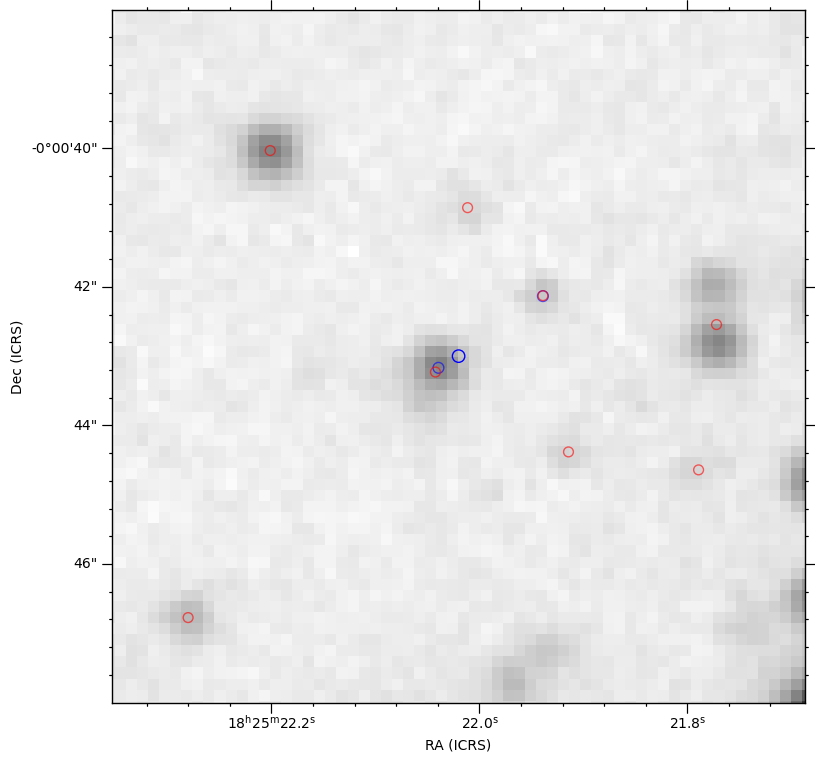

In [17]:

gc = aplpy.FITSFigure(flname.split(".fits")[0] + "_astrocal.fits") # this is the mos.fits file
gc.show_colorscale(cmap='gist_heat_r',stretch='arcsinh')
gc.show_markers(XRB_coo.ra.deg, XRB_coo.dec.deg, 
                edgecolor='blue', facecolor='none',
                marker='o', s=80, alpha=1)




gc.show_markers(coo_image[-1].ra.deg, coo_image[-1].dec.deg, edgecolor='b', facecolor='none', marker='o', s=60, alpha=0.6)
gc.show_markers(coo_image[-2].ra.deg, coo_image[-2].dec.deg, edgecolor='b', facecolor='none', marker='o', s=60, alpha=0.6)
gc.show_markers(coo_image[:-2].ra.deg, coo_image[:-2].dec.deg, edgecolor='r', facecolor='none', marker='o', s=50, alpha=0.6)

print("Number of SExtractor sources:", len(coo_image))

gc.recenter(XRB_coo.ra.deg, XRB_coo.dec.deg, 
            radius=5/3600.)# degrees
gc.set_theme('publication')



In [9]:
# hdu=headerList[1]
# print('shape :',hdu.shape) #shape is 1024*1024

# Try to open mos.fits.cat file
Its hard to try something with pandas because of multidimensional columns

In [10]:
data = fits.getdata(flname,ext=2)
print(data.columns)
print(type(data))


ColDefs(
    name = 'X_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'Y_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F11.4'
    name = 'FLUX_RADIUS'; format = '1E'; unit = 'pixel'; disp = 'F10.3'
    name = 'FLUX_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUXERR_AUTO'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'FLUX_MAX'; format = '1E'; unit = 'count'; disp = 'G12.7'
    name = 'ELONGATION'; format = '1E'; disp = 'F8.3'
    name = 'MAG_AUTO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'MAGERR_AUTO'; format = '1E'; unit = 'mag'; disp = 'F8.4'
    name = 'FWHM_IMAGE'; format = '1E'; unit = 'pixel'; disp = 'F8.2'
    name = 'CLASS_STAR'; format = '1E'; disp = 'F6.3'
    name = 'FLAGS'; format = '1I'; disp = 'I3'
    name = 'VIGNET'; format = '625E'; unit = 'count'; disp = 'G12.7'; dim = '(25, 25)'
    name = 'SNR_WIN'; format = '1E'; disp = 'G10.4'
)
<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [11]:
hdulist = fits.open(flname)
hdulist.info()


Filename: E:/Scriptie/FSRED/u018918_data/4U_1822-00/2018-06-19_H_4U_1822-00_1175_c1-4_58288_30295.mos.fits.cat
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  LDAC_IMHEAD    1 BinTableHDU     12   1R x 1C   [12320A]   
  2  LDAC_OBJECTS    1 BinTableHDU     62   48783R x 14C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 625E, 1E]   
